# Team members:
- Angie Chen
- Sukanya Ahuja 
- Nidhi Gadia
- Daniyal Daniyal 
- Farheen Humayun

    

In [ ]:
#This dataset is regarding Myers-Briggs Type indicator (MBTI) which is a kind of psychological classification
#about humans.
#MBTI is one of th emost popular tests in the world
# It is used in businesses, online, for fun, for research and lots of other purposes.
# This dataset has a 8,675 unique values
#This dataset has been taken from Kaggle
#The Myers Briggs Type Indicator (or MBTI for short) is a personality type system
#It divides everyone into 16 distinct personality types across 4 axis:
# 1. Introversion (I) – Extroversion (E)
# 2. Intuition (N) – Sensing (S)
# 3. Thinking (T) – Feeling (F)
# 4. Judging (J) – Perceiving (P)

In [ ]:
#Importing required packages

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
#import sys
#!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#from imblearn.over_sampling import SMOTE

# Data Wrangling
- Import file.
- Convert data into the DataFram, calculating some statsitcal data.
- Plot data distribution, check how often each value occurs.
- Count missing values and check data contents.


In [2]:
# Importing data 
data=pd.read_csv('C:/Users/gadia/OneDrive/Brandeis/Spring 2022/Machine Learning/project/mbti_1.csv')
# Check each column names
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
# Description of the data
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'Got a Ph.D. in computer science. Now I enjoy ...
freq,1832,1


<AxesSubplot:>

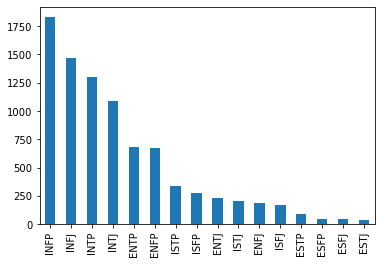

In [9]:
# Checking data distribution, which shows all the possible values and inditify how often each value occurs.
data['type'].value_counts().plot(kind='bar')

The data does not have a balanced sample

In [10]:
#checking for nulls or any missing value in the column, but in this case, we do not have missing vales.
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 8675 entries, 0 to 8674

Data columns (total 2 columns):

 #   Column  Non-Null Count  Dtype 

---  ------  --------------  ----- 

 0   type    8675 non-null   object

 1   posts   8675 non-null   object

dtypes: object(2)

memory usage: 135.7+ KB


In [11]:
#checking the data content
data.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

# Data Cleaning
- Removed unwanted links in the data content
- Split data into training and testing dataset.
- Plot the data distribution.
- Define the target encoding.

In [12]:
#function to clean data

def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in tqdm(data.posts):
        sentence=sentence.lower()
        
#         removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
#         removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
    
        
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

In [25]:
# Stratifying split to ensure equal distribution of data

train_data,test_data=train_test_split(data,test_size=0.2,random_state=42,stratify=data.type)
train_data.posts,train_length=clear_text(train_data)
test_data.posts,test_length=clear_text(test_data)

100%|█████████████████████████████████████████████████████████████████████████████| 6940/6940 [00:12<00:00, 550.90it/s]

C:\Users\gadia\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self[name] = value

100%|█████████████████████████████████████████████████████████████████████████████| 1735/1735 [00:02<00:00, 629.87it/s]


C:\Users\gadia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)

C:\Users\gadia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


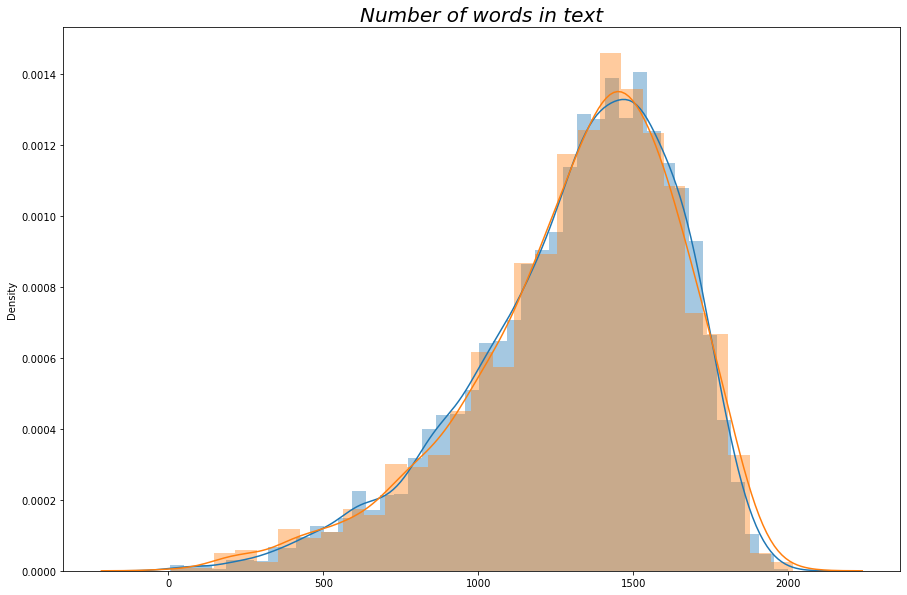

In [26]:
# Plot the length of posts

plt.figure(figsize=(15,10))
sns.distplot(train_length,label='train data word length')
sns.distplot(test_length,label='test data word length')
plt.title('Number of words in text',fontdict={'size':20,'style':'italic'})
plt.show()

In [27]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [32]:
#Tokenizing words

vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

C:\Users\gadia\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.

  warnings.warn('Your stop_words may be inconsistent with '


TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x000001A2DF96BF10>)

In [43]:
# Breaking down the words to different columns

X_train=vectorizer.transform(train_data.posts).toarray()
X_test=vectorizer.transform(test_data.posts).toarray()

In [45]:
#label encoding for traget variable

target_encoder=LabelEncoder()
y_train=target_encoder.fit_transform(train_data.type)
y_test=target_encoder.fit_transform(test_data.type)

# Modeling
- Logistic Regression, used to predict the probability of categorical dependent variable.
- KNN, a supervised machine learning model. Generate the KNN model using nerihbors value.
- SVC, support vector classifier to perform classification and regression. Return a best fit hyperplane effectively in a high dimensional space.
- Decision Tree, determine each possible consequences, chance event outcome. Enable to make decision on each leaf process.
- Random Forest, ensemble model. Compare to the tree, forest is average over forecasts from all tress.

In [ ]:
#empty object to add accuracies of all models
models_accuracy={}

In [61]:
#Logistic Regression
lr = LogisticRegression(max_iter=3000,solver="lbfgs")
lr.fit(X_train,y_train)
print('train classification report \n ',classification_report(y_train,lr.predict(X_train),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(y_test,lr.predict(X_test),target_names=target_encoder.inverse_transform([i for i in range(16)])))

# adding to model accuracy list
models_accuracy['logistic regression']=accuracy_score(y_test,lr.predict(X_test))

train classification report 

                precision    recall  f1-score   support



        ENFJ       0.83      0.32      0.46       152

        ENFP       0.83      0.74      0.78       540

        ENTJ       0.92      0.52      0.67       185

        ENTP       0.84      0.78      0.81       548

        ESFJ       0.75      0.09      0.16        34

        ESFP       0.00      0.00      0.00        38

        ESTJ       0.00      0.00      0.00        31

        ESTP       0.85      0.15      0.26        71

        INFJ       0.80      0.87      0.83      1176

        INFP       0.75      0.93      0.83      1465

        INTJ       0.80      0.85      0.82       873

        INTP       0.76      0.90      0.83      1043

        ISFJ       0.91      0.48      0.63       133

        ISFP       0.88      0.49      0.63       217

        ISTJ       0.87      0.52      0.65       164

        ISTP       0.88      0.72      0.79       270



    accuracy                 

C:\Users\gadia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

C:\Users\gadia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

C:\Users\gadia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

C:\Users\gadia\anaconda3\lib\site-packages\sklear

In [73]:
#KNN

neighbors_settings = [25,30,35,40,45]
test_accuracy = []

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    test_accuracy.append(accuracy_score(y_test,knn.predict(X_test)))
    
print(test_accuracy)

#Adding to model accuracy list
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
models_accuracy['K Nearest Neighbors']=accuracy_score(y_test,knn.predict(X_test))

[0.4904899135446686, 0.49971181556195965, 0.49913544668587895, 0.49452449567723344, 0.49913544668587895]


In [97]:
#SVC
sv = SVC(kernel="rbf",C=1.5,gamma=1.0,max_iter=10000)
sv.fit(X_train,y_train)
print('train classification report \n ',classification_report(y_train,sv.predict(X_train),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(y_test,sv.predict(X_test),target_names=target_encoder.inverse_transform([i for i in range(16)])))

#Adding to model accuracy list
models_accuracy['Support Vector Classifier']=accuracy_score(y_test,sv.predict(X_test))

train classification report 

                precision    recall  f1-score   support



        ENFJ       0.99      0.98      0.98       152

        ENFP       0.99      0.98      0.98       540

        ENTJ       1.00      0.97      0.98       185

        ENTP       0.98      0.99      0.98       548

        ESFJ       1.00      0.97      0.99        34

        ESFP       1.00      0.89      0.94        38

        ESTJ       1.00      1.00      1.00        31

        ESTP       1.00      0.97      0.99        71

        INFJ       0.99      0.98      0.98      1176

        INFP       0.98      0.99      0.99      1465

        INTJ       0.99      0.99      0.99       873

        INTP       0.98      0.99      0.99      1043

        ISFJ       1.00      0.98      0.99       133

        ISFP       0.99      0.98      0.99       217

        ISTJ       0.98      0.98      0.98       164

        ISTP       0.99      0.99      0.99       270



    accuracy                 

C:\Users\gadia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

C:\Users\gadia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

C:\Users\gadia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
#Decision Tree

depth_settings = [5,6,7,8,9,10,11,12,13,14,15]
test_accuracy = []

for depth in depth_settings:
    # build the model
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train,y_train)
    test_accuracy.append(accuracy_score(y_test,tree.predict(X_test)))
    
print(test_accuracy)

#Adding to model accuracy list
tree = DecisionTreeClassifier(max_depth=8)
tree.fit(X_train,y_train)
models_accuracy['Decision Tree Classifier']=accuracy_score(y_test,tree.predict(X_test))

[0.49164265129683, 0.5279538904899136, 0.5262247838616715, 0.530835734870317, 0.5291066282420749, 0.5273775216138329, 0.5106628242074928, 0.5118155619596542, 0.5198847262247839, 0.5123919308357349, 0.5123919308357349]


In [86]:
#Random Forest

depth_settings = [13,14,15,16,17,18]
test_accuracy = []

for depth in depth_settings:
    # build the model
    rf = RandomForestClassifier(max_depth=depth)
    rf.fit(X_train,y_train)
    test_accuracy.append(accuracy_score(y_test,rf.predict(X_test)))
    
print(test_accuracy)

#Adding to model accuracy list
rf = RandomForestClassifier(max_depth=17)
rf.fit(X_train,y_train)
models_accuracy['Random Forest Classifier']=accuracy_score(y_test,rf.predict(X_test))

[0.5014409221902018, 0.514121037463977, 0.5129682997118156, 0.506628242074928, 0.5221902017291066, 0.5181556195965418]


# Conclusion and Comparsion

In [100]:
accuracy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])
accuracy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,Support Vector Classifier,0.662824
1,logistic regression,0.651297
2,Decision Tree Classifier,0.529107
3,Random Forest Classifier,0.514697
4,K Nearest Neighbors,0.499712


- We created a model accuracy list to add all the models into the table. As the result interprested from above, we can see the best model is Support vector classifier with test accuracy 0.66. The computational complexity of SVC is higher than other models to distinguishing between several classes.